# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installation

In [2]:
# !pip install scikit_optimize
# !pip install lightgbm
# !pip install auto-sklearn 


In [3]:
# change runtime type
# GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Apr  2 12:20:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# # TPU

%tensorflow_version 2.x 
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.0


# Imports

In [5]:
import numpy as np 
import pandas as pd 
import os
from os import listdir, getcwd, system
import datetime
import time
import timeit
from math import sqrt 
import pickle
import gc
import json

import joblib
# skopt.space.space

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# from Dash_converter import checkpoint, experiment

# preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFwe, f_regression, SelectKBest, SelectFdr, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# # text mining
# import nltk
# nltk.download('all-corpora', 'punkt', 'stopwords') # NLP - Download 'all-corpora' and 'punkt' from nltk
# from nltk.tokenize import sent_tokenize, word_tokenize, punkt
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re, string
# from sklearn.feature_extraction.text import TfidfVectorizer

# decomposition
from sklearn.decomposition import PCA

# Models
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm

from sklearn.preprocessing import StandardScaler  #minmaxscaler (image data - here not known) #maxscaler
from sklearn.linear_model import MultiTaskLasso, PassiveAggressiveClassifier, LogisticRegression, SGDClassifier, Perceptron, LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import multilabel_confusion_matrix, classification_report, explained_variance_score, r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, make_scorer, accuracy_score, confusion_matrix, average_precision_score, f1_score, precision_score, recall_score 

# from lightgbm import LGBMRegressor
# from xgboost.sklearn import XGBRegressor
# from catboost import CatBoostRegressor

# import lightgbm as lgb
# import xgboost as xgb
# import catboost as ctb


# deeplearning
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import InceptionResNetV2, Xception, MobileNetV2, NASNetMobile, InceptionV3, EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow import keras

from keras import optimizers
from keras.models import Model, Sequential, load_model
from keras.applications import vgg16



from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Input, GlobalAveragePooling2D, BatchNormalization
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


# image
from PIL import Image
import PIL
import matplotlib.image as mpimgC
from PIL import Image
import PIL
from skimage.io import imread, imshow
from skimage import io
import cv2 as cv

# Hyperparameter tuning
# from functools import partial
# from skopt.searchcv import BayesSearchCV
# from skopt import space 
# from skopt.space import Integer, Real, Categorical 
# from skopt.utils import use_named_args
# from skopt import gp_minimize
# import autosklearn.regression
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, STATUS_FAIL

#dropdown
import ipywidgets as widgets
import IPython
from IPython.display import Image
from IPython.core.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual


# To see multiple outputs from a cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 20) 

# Setup
import warnings
warnings.filterwarnings('ignore')


In [6]:
def save_obj(obj, path, name):
    with open(path +"/"+name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(path, name):
    with open(path +"/"+ name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [7]:
gc.collect()
tf.keras.backend.clear_session()

In [8]:
seed=42
tf.random.set_seed(seed)
np.random.seed(seed)

In [9]:
os.listdir()

['.config', 'drive', 'sample_data']

## check runtime (cpu)

In [10]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [11]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4914955583720613689
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14436532224
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5008209221533021244
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### Parameters


In [12]:
#@title String fields (change this to train the model with all the data and to save it)

PExperimentName = 'MobileNetV2_hillLR_submission' #@param {type:"string"}
PFULL_RUN = False #@param ["False", "True"] {type:"raw"}
PSAVE_Model = False #@param ["False", "True"] {type:"raw"}

In [13]:
Parameter = {
    # Experiment Name
    "ExperimentName" : "", 

    # Setup
    "FULL_RUN" : None, #to train on all data or just a fraction 
    "SAVE_Model" : None, #save locally on colab 

    #Preprocessing
    "image_size" : 224, #300 for REsNet #224 for MobileNet # 256 original (custom)

    #select model
    'create_CustomModel' : False,
    'creat_MobileNetV2' : True,
    'create_MobileNetV2_Freeze' : False, # not yet working
    'create_EfficientNetV2S' : False, # not yet working
    'create_CustomModel_easy': False, # not yet working
    'create_Xception_TPU': False,
    
    
    #Tune: 
    ##Training
    # "ReduceLROnPlateau"  monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.000001
    "epochs" : 30,
    "batch_size" : 32, #more = Lernen ist effektiver dauert aber länger + never find global optimum
    "dropout_rate" : 0.01, #reduces overfitting

    "optimizer": "Adam", 
    # "optimizer": "Adadelta", 
    # "optimizer": "RMSprop", 

    "learning_rate" : 0.00001,
    
    "V_shaped_lr": True,
    "max_learning_rate_factor":40,
    "rampup_epochs":5,

    ##callbacks
    # ReduceLROnPlateau_

    # ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.000001),
    #          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 


}
# logic

Parameter['input_shape'] = (Parameter["image_size"], Parameter["image_size"], 3)

In [14]:
# overwrite with before
Parameter['ExperimentName'] = PExperimentName
Parameter['FULL_RUN'] = PFULL_RUN
if Parameter['FULL_RUN']:
  Parameter['ExperimentName']  = "{}_{}".format(Parameter['ExperimentName'] ,"full_dataset_")

Parameter['SAVE_Model'] = PSAVE_Model


In [15]:
Parameter

{'ExperimentName': 'MobileNetV2_hillLR_submission',
 'FULL_RUN': False,
 'SAVE_Model': False,
 'V_shaped_lr': True,
 'batch_size': 32,
 'creat_MobileNetV2': True,
 'create_CustomModel': False,
 'create_CustomModel_easy': False,
 'create_EfficientNetV2S': False,
 'create_MobileNetV2_Freeze': False,
 'create_Xception_TPU': False,
 'dropout_rate': 0.01,
 'epochs': 30,
 'image_size': 224,
 'input_shape': (224, 224, 3),
 'learning_rate': 1e-05,
 'max_learning_rate_factor': 40,
 'optimizer': 'Adam',
 'rampup_epochs': 5}

### Folders

In [16]:
os.listdir('drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data')

['labels.csv',
 'train',
 'valid',
 'test_oneClass',
 'test_oneClass2',
 'test_lime',
 'test_dog']

In [17]:
folder_deep_weeds = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds'
data_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data'
models_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/models'

if Parameter["FULL_RUN"]:
  train_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data/train'
  valid_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data/valid'
  test_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data/test_oneClass2'
else:
  train_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data_small_sample/train'
  valid_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data_small_sample/valid'
  test_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data/test_oneClass2'
  #test_folder = 'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data_small_sample/test_oneClass'

# First look into the dataset

In [18]:
# for classes_training in os.listdir(train_folder):
#   print("\nClass: ", classes_training)#, os.listdir(os.path.join(train_folder,classes_training)
#   images_training_folder_class = os.listdir(os.path.join(train_folder,classes_training))
#   for i in range(3): #show 3 images per class
#     img = io.imread(os.path.join(train_folder,classes_training,images_training_folder_class[i]))
#     fig1 = px.imshow(img)
#     fig1.show()


## Prepare the training and validation data generators

In [19]:
valid_folder

'drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data_small_sample/valid'

In [20]:
train_datagen = ImageDataGenerator(
        rescale=1./255, #not for efficient net
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode = 'nearest',
        channel_shift_range=0.5,
        brightness_range=[0.5,1.2],
        rotation_range=25,
        zoom_range=[0.5, 1],
        )
validation_datagen = ImageDataGenerator(
        rescale=1./255, 
        )

test_datagen = ImageDataGenerator(
        rescale=1./255, 
        )

In [21]:
train_generator = train_datagen.flow_from_directory(
        directory=train_folder,
        target_size=(Parameter["image_size"], Parameter["image_size"]),
        shuffle=True,
        color_mode='rgb',
        batch_size=Parameter["batch_size"] ,
        class_mode='categorical',
        seed=42

)
valid_generator = validation_datagen.flow_from_directory(
        directory=valid_folder,
        target_size=(Parameter["image_size"], Parameter["image_size"]),
        shuffle=True,
        color_mode='rgb',
        batch_size=Parameter["batch_size"] ,
        class_mode='categorical',
        seed=42
) 

test_generator = test_datagen.flow_from_directory(
        directory=test_folder,
        target_size=(Parameter["image_size"], Parameter["image_size"]),
        color_mode="rgb",
        batch_size=1,
        class_mode=None,
        shuffle=False,
        seed=42
)


Found 944 images belonging to 9 classes.
Found 256 images belonging to 9 classes.
Found 953 images belonging to 1 classes.


In [22]:
os.listdir('drive/MyDrive/Industrial_Applications_of_AI/Primary_Sector/DeepWeeds/data')

['labels.csv',
 'train',
 'valid',
 'test_oneClass',
 'test_oneClass2',
 'test_lime',
 'test_dog']

# Built the model

In [23]:
def createCustomModel():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',
                 input_shape = Parameter["input_shape"]))

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))


    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(Parameter['dropout_rate']))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
    #model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(Parameter['dropout_rate']))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(Parameter['dropout_rate']))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(Parameter['dropout_rate']))
    model.add(Dense(9, activation='softmax'))

    return model

In [24]:
def createCustomModel_easy():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',
                 input_shape = Parameter["input_shape"]))
    model.add(MaxPooling2D(strides=(2,2)))

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
    model.add(MaxPooling2D(strides=(2,2)))

    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation='relu'))
    model.add(MaxPooling2D(strides=(2,2)))

    model.add(Dropout(Parameter['dropout_rate']))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(9, activation='softmax'))

    return model

In [25]:
createCustomModel_easy().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 8)        0

# Transfer learning

In [26]:
from keras.applications.mobilenet_v2 import preprocess_input

def create_model_MobileNetV2():
    Mobilenet= MobileNetV2(
        weights="imagenet",
        include_top=False, 
        input_shape=Parameter["input_shape"], 
    )
    
    Mobilenet.trainable = True
    
    #Start 
    input_layer = Input(shape = Parameter["input_shape"])
    preprocess = preprocess_input(input_layer) #tf.math.truediv #tf.math.subtract
    Mobilenet_Added = Mobilenet(preprocess) # Add preprocessing Layer to start
    
    #Output
    flatten = Flatten()(Mobilenet_Added)
    # x1=Dense(64,activation='relu')(flatten) #dense layer 1
    # x2=Dense(32,activation='relu')(x1) #dense layer 2
    outputs = Dense(9, activation="softmax")(flatten)
    
    #Full Model
    model = Model(inputs=input_layer, outputs=outputs)
    
    return model

# rest transfer

In [27]:
def create_model_MobileNetV2_Freeze():
    base_model= MobileNetV2(weights="imagenet", 
                                   include_top=False, 
                                   input_shape=Parameter["input_shape"], 
                                   )#imports the mobilenet model and discards the last 1000 neuron layer.
    
#    for layer in base_model.layers[:3]: #first 20 Layers not trainable 
#         layer.trainable=False
    #for layer in base_model.layers[10:]:
    #    layer.trainable=True
    

    #Start 
    input_layer = Input(shape = Parameter["input_shape"])
    preprocess = preprocess_input(input_layer) #tf.math.truediv #tf.math.subtract
    efficientnet = base_model(preprocess) # Add preprocessing Layer to start 
    
    #Output
    #x=base_model.output
    x=GlobalAveragePooling2D()(efficientnet)
    x=Dense(1280,activation='relu')(x)
    x=Dense(256,activation='relu')(x) #add dense layers so that the model can learn more complex functions and classify for better results.
    x=Dense(32,activation='relu')(x) #dense layer 2
    x = Dropout(Parameter["dropout_rate"])(x) # Reduces overfitting 
    preds=Dense(4,activation='softmax')(x) #final layer with softmax activation
    
    model=Model(inputs=input_layer,outputs=preds) 
    
    return model

- Newest models from keras: https://keras.io/api/applications/
- https://arxiv.org/abs/2104.00298


In [28]:
image_size_map = {
    'efficientnetv2-b0': 224,
    'efficientnetv2-b1': 240,
    'efficientnetv2-b2': 260,
    'efficientnetv2-b3': 300,
    'efficientnetv2-s':  384,
    'efficientnetv2-m':  480,
    'efficientnetv2-l':  480,
    'efficientnetv2-xl':  512,
  
    'efficientnet_b0': 224,
    'efficientnet_b1': 240,
    'efficientnet_b2': 260,
    'efficientnet_b3': 300,
    'efficientnet_b4': 380,
    'efficientnet_b5': 456,
    'efficientnet_b6': 528,
    'efficientnet_b7': 600,
  }
#https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=387d5ddb92bb8fbbec4b012e5636a81ea65fffda&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f676f6f676c652f6175746f6d6c2f333837643564646239326262386662626563346230313265353633366138316561363566666664612f656666696369656e746e657476322f74666875622e6970796e62&logged_in=false&nwo=google%2Fautoml&path=efficientnetv2%2Ftfhub.ipynb&platform=android&repository_id=246738676&repository_type=Repository&version=98

In [29]:
from keras.applications.efficientnet_v2 import preprocess_input

def EfficientNetV2S ():
    Mobilenet= EfficientNetV2S(
        weights="imagenet",
        include_top=False, 
        input_shape=Parameter["input_shape"], 
        # pooling=None, None , avg, max
        # classes=1000,
        # classifier_activation="softmax",
        # include_preprocessing=True,


    )
    
    Mobilenet.trainable = True
    
    #Start 
    input_layer = Input(shape = Parameter["input_shape"])
    preprocess = preprocess_input(input_layer) #tf.math.truediv #tf.math.subtract
    Mobilenet_Added = Mobilenet(preprocess) # Add preprocessing Layer to start
    
    #Output
    pooling = MaxPooling2D()(Mobilenet_Added) # 3 Dimensions to One 
    dropout = Dropout(Parameter["dropout_rate"])(pooling) # Reduces overfitting 
    outputs = Dense(9, activation="softmax")(dropout)
    
    #Full Model
    model = Model(inputs=input_layer, outputs=outputs)
    
    return model

In [30]:
def create_model_Xception_TPU():
  pretrained_model = tf.keras.applications.Xception(input_shape=[*[Parameter['image_size'],Parameter['image_size']], 3], include_top=False)
  pretrained_model.trainable = True
  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(9, activation='softmax')
  ])
  
  return model

# Initialize

In [31]:
def create_Model_from_Parameter(Parameter):
  if Parameter['create_CustomModel']:
    model = createCustomModel()
  elif Parameter['creat_MobileNetV2']:
    model = create_model_MobileNetV2()
  elif Parameter['create_MobileNetV2_Freeze']:
    create_model_MobileNetV2_Freeze()
  elif Parameter['create_EfficientNetV2S']:
    model = create_model_MobileNetV2()
  elif Parameter['create_CustomModel_easy']:
    model = createCustomModel_easy()
  elif Parameter['create_Xception_TPU']:
    with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
      model = create_model_Xception_TPU()
    

  model.summary()
  return model

In [32]:
def compileModel (model,Parameter):
  if Parameter['optimizer'] == "Adam":
    print('adam')
    model.compile(Adam(learning_rate=Parameter['learning_rate']),
      loss="categorical_crossentropy", metrics=["accuracy"])  
    
  elif Parameter['optimizer'] == "Adadelta":
      model.compile(Adadelta(learning_rate=Parameter['learning_rate']),
      loss="categorical_crossentropy", metrics=["accuracy"])  

  elif Parameter['optimizer'] == "RMSprop":
      model.compile(RMSprop(lr=Parameter['learning_rate']),
      loss="categorical_crossentropy", metrics=["accuracy"])  
  return model

In [33]:
def createCallbacks(Parameter):
  if not Parameter['V_shaped_lr']:
    callbacks = [
                ReduceLROnPlateau(monitor='val_accuracy', patience = 4, verbose=1,factor=0.5, min_lr=0.000001),
                tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)  
    ]
  else:
      # https://colab.research.google.com/notebooks/tpu.ipynb#scrollTo=iXJXG-Ufdbnu



      start_lr = Parameter['learning_rate']
      min_lr = 0.00001
      max_lr = Parameter['learning_rate']*Parameter['max_learning_rate_factor'] #0.00005 *8 #* tpu_strategy.num_replicas_in_sync
      rampup_epochs = Parameter['rampup_epochs'] # 5
      sustain_epochs = 0
      exp_decay = .8

      def lrfn(epoch):
        if epoch < rampup_epochs:
          return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
        elif epoch < rampup_epochs + sustain_epochs:
          return max_lr
        else:
          return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
          
      


      callbacks = [
                  tf.keras.callbacks.LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=True),
                  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)  
      ]

      rang = np.arange(Parameter['epochs'])
      y = [lrfn(x) for x in rang]
      plt.plot(rang, y)
      print('Learning rate per epoch:')

  return callbacks

Learning rate per epoch:


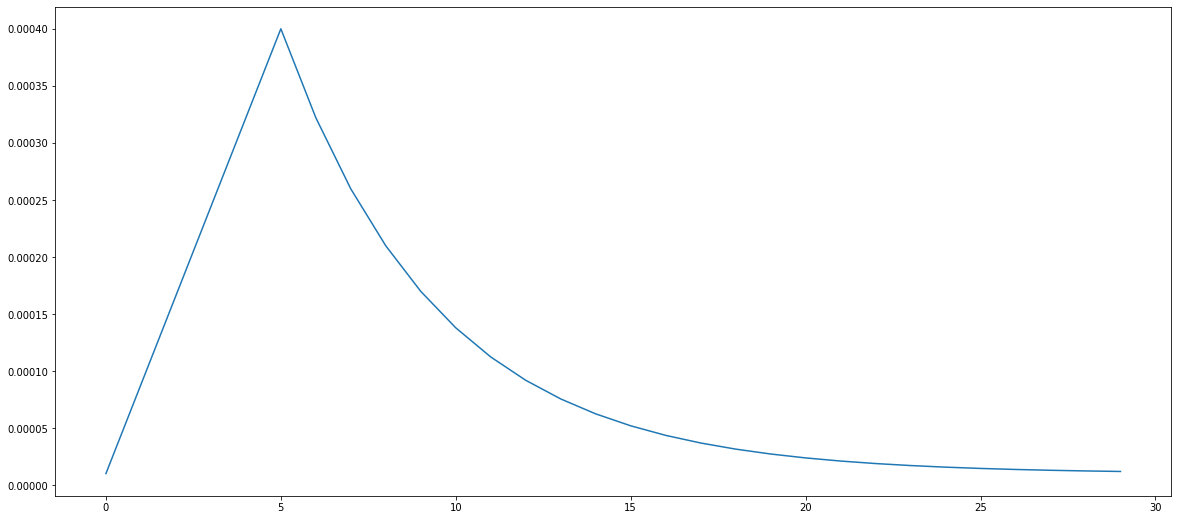

In [34]:
plt.rcParams["figure.figsize"] = (20,9)
createCallbacks(Parameter)

# Metrics

### Search for actual labels in the csv file

In [35]:
# return actual label from csv file
def return_label(filename,df_labels): #actual label
  filename_last = filename.split('/')[-1]
  row = df_labels[df_labels['Filename']==filename_last]
  return row[['Species']].iloc[0,0]

# return actual label number from csv file
def return_label_num(filename,df_labels,CLASSES_reversed):
  filename_last = filename.split('/')[-1]
  row = df_labels[df_labels['Filename']==filename_last]
  return CLASSES_reversed[str(row[['Species']].iloc[0,0])]

  # PROBLEM
  # In training negative class = 2
  # In actual csv: negative class = 8
  # filename_last = filename.split('/')[-1]
  # row = df_labels[df_labels['Filename']==filename_last]
  # return row[['Label']].iloc[0,0]

### create prediction with training generator and create combined csv with actual and predicted values

In [36]:
def createPrediction(model):
  # huge thanks to https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
  # predict with test generator
  STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
  test_generator.reset()
  pred=model.predict_generator(test_generator,
    steps=STEP_SIZE_TEST,
    verbose=1)

  df_pred = pd.DataFrame(pred)
  df_pred.columns = train_generator.class_indices.keys()

  # take highest prediction an label it
  predicted_class_indices=np.argmax(pred,axis=1)
  
  CLASSES = (train_generator.class_indices)
  CLASSES = dict((v,k) for k,v in CLASSES.items())
  CLASSES_reversed = {v: k for k, v in CLASSES.items()}

  predictions = [CLASSES[k] for k in predicted_class_indices]

  # combine into df
  filenames=test_generator.filenames
  results=pd.DataFrame({"Filename":filenames,
                        "Predictions":predictions,
                        "Predictions_num":predicted_class_indices,
                        })
  
  results_combined = pd.concat([results, df_pred.reindex(results.index)], axis=1)
  
  # read actual labels
  df_labels = pd.read_csv('{}/labels.csv'.format(data_folder))
  
  # add actual label
  results_combined['Actual'] = [return_label(filename, df_labels) for filename in results_combined['Filename']]
  
  # add label number
  results_combined['Actual_num'] = [return_label_num(filename, df_labels,CLASSES_reversed) for filename in results_combined['Filename']]
  

  return results_combined, CLASSES

### confusion_matrix_Normalized

In [37]:
def create_confusion_matrix_Normalized(y_true, y_pred, class_names):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred, normalize="true")

    layout = {
        "title": "Confusion Matrix", 
        "xaxis": {"title": "Predicted value"}, 
        "yaxis": {"title": "Real value"}
    }

    fig_cf = go.Figure(data=go.Heatmap(z=confusion_matrix,
                                    x=class_names,
                                    y=class_names,
                                    hoverongaps=False),
                    layout=layout)
    # fig.show()
    return fig_cf


# Train

In [38]:
def train_experiments(Parameter):
  # clear previous run
  gc.collect()
  tf.keras.backend.clear_session()

  # create model
  print('\nModel Architecture:')
  model = create_Model_from_Parameter(Parameter)

  # compile model
  print('\nOptimizer:')
  model = compileModel (model,Parameter)
  # create callbacks
  callbacks = createCallbacks(Parameter)

  # Fitting models to the generators
  print('\nTraining:')
  history = model.fit(
      train_generator,
      steps_per_epoch=int(np.ceil(train_generator.n / float(Parameter["batch_size"]))),# to use image data generator properly
      epochs=Parameter['epochs'],
      validation_data=valid_generator,
      validation_steps=int(np.ceil(valid_generator.n / float(Parameter["batch_size"]))),
      callbacks = callbacks,
      verbose = 1 #show all
  )

  # Save the parameters, predictions, history, model, Plotly Graphs
  
  
  STARTTIME = datetime.datetime.now()
  FOLDERNAME = '{}_{}'.format(STARTTIME.strftime('%Y-%m-%d__%H-%M-%S'),Parameter["ExperimentName"] )

  FOLDERNAME_PATH_SAVE = '{}/models/{}'.format(folder_deep_weeds,FOLDERNAME)
  os.mkdir(FOLDERNAME_PATH_SAVE)
  print("\nSave all here: {}/".format(FOLDERNAME_PATH_SAVE))

  #model
  if Parameter['SAVE_Model']:
    model.save('{}/model.h5'.format(FOLDERNAME_PATH_SAVE))
  #parameters and hyperparameters
  with open('{}/Parameter.json'.format(FOLDERNAME_PATH_SAVE), 'w') as outfile:
      json.dump(Parameter, outfile)
  # save_obj(Parameter, FOLDERNAME_PATH_SAVE, 'history')
  

  #history
  save_obj(history.history, FOLDERNAME_PATH_SAVE, 'history')

  #create fig for history
  print('\nHistory:')
  df_history = pd.DataFrame(history.history)
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=list(range(len(df_history['loss']))), y=df_history['loss'],mode='lines',name='Train_loss',line = dict(color='rgb(0, 0, 113)')))
  fig.add_trace(go.Scatter(x=list(range(len(df_history['accuracy']))), y=df_history['accuracy'],mode='lines',name='Train_accuracy',line = dict(color='blue')))
  fig.add_trace(go.Scatter(x=list(range(len(df_history['val_loss']))), y=df_history['val_loss'],mode='lines',name='Val_loss',line = dict(color='firebrick')))
  fig.add_trace(go.Scatter(x=list(range(len(df_history['val_accuracy']))), y=df_history['val_accuracy'],mode='lines',name='Val_accuracy',line = dict(color='red')))

  fig.update_layout(
      title="Model Results",
      xaxis=dict(title='Epochs',tickmode='linear'),
      yaxis=dict(title='acc/loss',tickmode='linear',range=[0,1],dtick = 0.1),
      legend=dict(orientation="h",xanchor="center",yanchor="top",y=-0.15,x=0.5 )
  )
  fig.show()
  fig.write_html('{}/model_History.html'.format(FOLDERNAME_PATH_SAVE))

  # create predictions and load actual values
  # print('\nPredicting with test set:')
  # results_combined,CLASSES  = createPrediction(model)
  # results_combined.to_csv("{}/predictions.csv".format(FOLDERNAME_PATH_SAVE),index=False)

  # # confusion matrix
  # print('\nConfusion Matrix test set:')
  # fig_cf = create_confusion_matrix_Normalized(np.array(results_combined['Actual_num']), np.array(results_combined['Predictions_num']), list(CLASSES.values()))
  # fig_cf.show()
  # fig_cf.write_html('{}/confusion_matrix.html'.format(FOLDERNAME_PATH_SAVE))
  
  # # print actual confusin matrix
  # print('\nConfusion Matrix actual values:')
  # display(metrics.confusion_matrix(np.array(results_combined['Actual_num']), np.array(results_combined['Predictions_num'])))  
  print('\nPredicting with test set:')
  results_combined,CLASSES  = createPrediction(model) 
  display(results_combined)
  results_combined.to_csv("{}/predictions.csv".format(FOLDERNAME_PATH_SAVE),index=False)

  # easyer way to access predicted and actual
  test_y = np.array(results_combined['Actual_num'])
  test_Y_prediction = np.array(results_combined['Predictions_num'])

  # simple metrics
  print('Test accuracy:', accuracy_score(test_y, test_Y_prediction))

  # classification report
  classification_report_output = classification_report(test_y , test_Y_prediction, target_names=list(CLASSES.values()), output_dict=True)  
  # display(classification_report_output)
  #set figsize for seaborn
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  # get seaborn figure
  clf_plot = sns.heatmap(pd.DataFrame(classification_report_output).iloc[:-1, :].T, annot=True)
  fig_clf = clf_plot.get_figure()
  plt.show()
  fig_clf.savefig('{}/classification_report.png'.format(FOLDERNAME_PATH_SAVE))

  # create confusion matrix
  fig_cm = create_confusion_matrix_Normalized( test_y , test_Y_prediction, list(CLASSES.values()))
  fig_cm.show()
  fig_cm.write_html('{}/confusion_matrix.html'.format(FOLDERNAME_PATH_SAVE))
  display(metrics.confusion_matrix(np.array(results_combined['Actual_num']), np.array(results_combined['Predictions_num'])))  


## change the parameter for one experiment chain (learning rate from high to low)

In [39]:
#@title Single Experiment
TRAINING_SINGLE = True #@param ["False", "True"] {type:"raw"}

ExperimentName:  MobileNetV2_hillLR_submission  Learning_rate:  1e-05
{'ExperimentName': 'MobileNetV2_hillLR_submission', 'FULL_RUN': False, 'SAVE_Model': False, 'image_size': 224, 'create_CustomModel': False, 'creat_MobileNetV2': True, 'create_MobileNetV2_Freeze': False, 'create_EfficientNetV2S': False, 'create_CustomModel_easy': False, 'create_Xception_TPU': False, 'epochs': 30, 'batch_size': 32, 'dropout_rate': 0.01, 'optimizer': 'Adam', 'learning_rate': 1e-05, 'V_shaped_lr': True, 'max_learning_rate_factor': 40, 'rampup_epochs': 5, 'input_shape': (224, 224, 3)} 


Model Architecture:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                     


Predicting with test set:
953/953 [==============================] - 10s 9ms/step


,Filename,Predictions,Predictions_num,Chinee apple,Lantana,Negative,Parkinsonia,Parthenium,Prickly acacia,Rubber vine,Siam weed,Snake weed,Actual,Actual_num
0,test/20160928-141421-0.jpg,Negative,2,1.159139e-02,3.341777e-06,0.975705,4.932509e-06,8.935079e-06,1.268319e-02,4.216704e-07,8.233433e-07,2.326866e-06,Chinee apple,0
1,test/20161207-111058-0.jpg,Chinee apple,0,9.999616e-01,3.499792e-09,0.000021,8.435535e-16,2.049578e-11,5.422495e-10,4.519204e-13,1.722075e-05,2.983095e-09,Chinee apple,0
2,test/20161207-111122-0.jpg,Chinee apple,0,9.618184e-01,5.169715e-08,0.037111,2.980956e-12,6.861593e-10,2.219639e-07,3.927818e-10,1.069831e-03,2.351691e-07,Chinee apple,0
3,test/20161207-111246-0.jpg,Negative,2,1.120462e-04,2.137842e-08,0.999841,7.077315e-06,3.083734e-06,1.309522e-05,9.362596e-10,2.397787e-05,1.775213e-07,Chinee apple,0
4,test/20161207-111440-0.jpg,Negative,2,1.947254e-02,4.327457e-08,0.980523,4.055852e-08,3.289937e-06,5.836665e-07,1.496053e-09,1.822927e-07,4.518199e-07,Chinee apple,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,test/20180322-112952-2.jpg,Negative,2,8.213607e-13,1.717684e-16,1.000000,1.225783e-10,5.604325e-13,1.449836e-11,7.442929e-20,2.540863e-13,2.935926e-14,Negative,2
949,test/20180322-114119-1.jpg,Negative,2,6.802942e-10,1.747967e-13,0.999996,2.714907e-09,9.438002e-13,3.932685e-06,2.245973e-16,8.156370e-10,1.031926e-11,Negative,2
950,test/20180322-125050-1.jpg,Negative,2,1.042569e-03,6.408880e-10,0.991031,4.365314e-05,3.093187e-05,7.807153e-03,2.074498e-09,4.299095e-05,1.793004e-06,Negative,2
951,test/20180322-132255-1.jpg,Negative,2,3.428786e-09,3.175006e-13,0.999980,3.117686e-08,1.790220e-09,1.963801e-05,3.823981e-15,6.336622e-07,5.044252e-10,Negative,2


Test accuracy: 0.18467995802728226


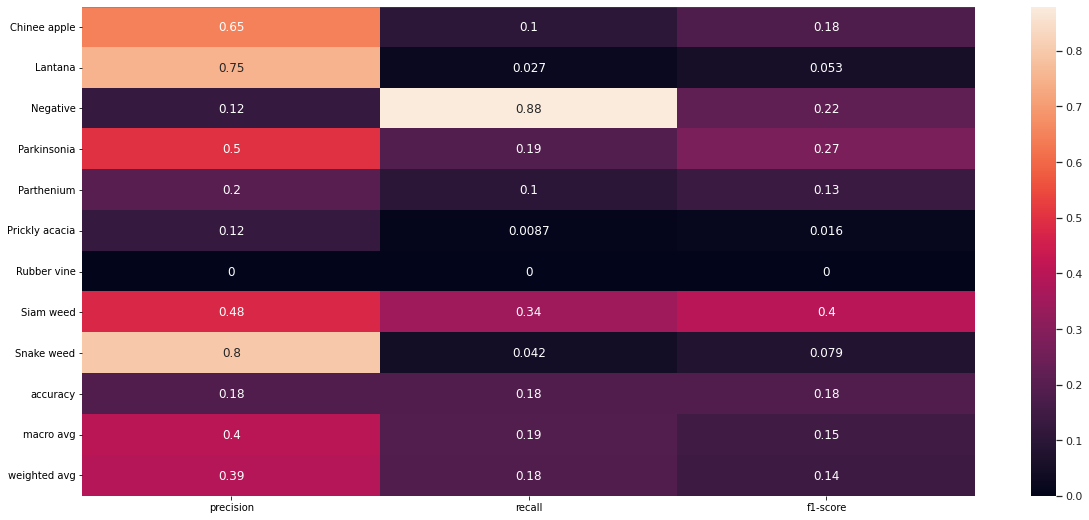

array([[11,  1, 91,  0,  2,  0,  0,  1,  0],
       [ 2,  3, 97,  0,  1,  0,  0,  7,  0],
       [ 0,  0, 95,  5,  5,  0,  0,  3,  0],
       [ 0,  0, 81, 20,  4,  1,  0,  0,  0],
       [ 0,  0, 85,  5, 10,  0,  0,  0,  0],
       [ 0,  0, 87,  2, 25,  1,  0,  0,  0],
       [ 1,  0, 89,  1,  0,  6,  0, 21,  1],
       [ 0,  0, 53,  7,  1,  0,  0, 32,  0],
       [ 3,  0, 85,  0,  1,  0,  0,  3,  4]])

In [40]:
# # Run one experiment
if TRAINING_SINGLE:
  Parameter_fast_test_run = Parameter.copy()
  Parameter_Experiment = Parameter_fast_test_run



  # run the expereiment
  print('ExperimentName: ', Parameter['ExperimentName'], ' Learning_rate: ', Parameter_Experiment['learning_rate'])
  print(Parameter_Experiment,'\n')
  
  train_experiments(Parameter_Experiment)


In [41]:
# Run multible experiments (chain)

folder_description_chainName="Chain_2"


Parameter_MobileNetV2_Experiment_1 = Parameter.copy()
Parameter_MobileNetV2_Experiment_2 = Parameter.copy()
Parameter_MobileNetV2_Experiment_3 = Parameter.copy()
Parameter_MobileNetV2_Experiment_4 = Parameter.copy()
Parameter_MobileNetV2_Experiment_5 = Parameter.copy()
Parameter_MobileNetV2_Experiment_6 = Parameter.copy()
Parameter_MobileNetV2_Experiment_7 = Parameter.copy()
Parameter_MobileNetV2_Experiment_8 = Parameter.copy()

# Parameter_MobileNetV2_Experiment_1['ExperimentName'] = '{}_{}_very_high_lr_small_dataset'.format(folder_description_chainName,Parameter['ExperimentName'])
# Parameter_MobileNetV2_Experiment_1['learning_rate'] = 0.1
# Parameter_MobileNetV2_Experiment_2['ExperimentName'] = '{}_{}_high_lr_small_dataset'.format(folder_description_chainName,Parameter['ExperimentName'])
# Parameter_MobileNetV2_Experiment_2['learning_rate'] = 0.01
# Parameter_MobileNetV2_Experiment_3['ExperimentName'] = '{}_{}__medium_lr_small_dataset'.format(folder_description_chainName,Parameter['ExperimentName'])
# Parameter_MobileNetV2_Experiment_3['learning_rate'] = 0.001
# Parameter_MobileNetV2_Experiment_4['ExperimentName'] = '{}_{}_low_lr_small_dataset'.format(folder_description_chainName,Parameter['ExperimentName'])
# Parameter_MobileNetV2_Experiment_4['learning_rate'] = 0.0001
# Parameter_MobileNetV2_Experiment_5['ExperimentName'] = '{}_{}_very_low_lr_small_dataset'.format(folder_description_chainName,Parameter['ExperimentName'])
# Parameter_MobileNetV2_Experiment_5['learning_rate'] = 0.00001


Parameter_MobileNetV2_Experiment_2['ExperimentName'] = '{}_{}_high_lr'.format(folder_description_chainName,Parameter['ExperimentName'])
Parameter_MobileNetV2_Experiment_2['learning_rate'] = 0.01
Parameter_MobileNetV2_Experiment_3['ExperimentName'] = '{}_{}_medium_lr'.format(folder_description_chainName,Parameter['ExperimentName'])
Parameter_MobileNetV2_Experiment_3['learning_rate'] = 0.001
Parameter_MobileNetV2_Experiment_4['ExperimentName'] = '{}_{}_low_lr'.format(folder_description_chainName,Parameter['ExperimentName'])
Parameter_MobileNetV2_Experiment_4['learning_rate'] = 0.0001
Parameter_MobileNetV2_Experiment_5['ExperimentName'] = '{}_{}_very_low_lr'.format(folder_description_chainName,Parameter['ExperimentName'])
Parameter_MobileNetV2_Experiment_5['learning_rate'] = 0.00001
Parameter_MobileNetV2_Experiment_6['ExperimentName'] = '{}_{}_vvery_low_lr'.format(folder_description_chainName,Parameter['ExperimentName'])
Parameter_MobileNetV2_Experiment_6['learning_rate'] = 0.000001
Parameter_MobileNetV2_Experiment_7['ExperimentName'] = '{}_{}_vvvery_low_lr'.format(folder_description_chainName,Parameter['ExperimentName'])
Parameter_MobileNetV2_Experiment_7['learning_rate'] = 0.0000001
Parameter_MobileNetV2_Experiment_8['ExperimentName'] = '{}_{}_vvvvery_low_lr'.format(folder_description_chainName,Parameter['ExperimentName'])
Parameter_MobileNetV2_Experiment_8['learning_rate'] = 0.00000001


Experiments = [ #ordered by probability to have a good result
               
               Parameter_MobileNetV2_Experiment_5,
               Parameter_MobileNetV2_Experiment_6,
               Parameter_MobileNetV2_Experiment_7,
               Parameter_MobileNetV2_Experiment_8,
               Parameter_MobileNetV2_Experiment_4,
               Parameter_MobileNetV2_Experiment_3,
               Parameter_MobileNetV2_Experiment_2,
               ]
pd.DataFrame(Experiments)

,ExperimentName,FULL_RUN,SAVE_Model,image_size,create_CustomModel,creat_MobileNetV2,create_MobileNetV2_Freeze,create_EfficientNetV2S,create_CustomModel_easy,create_Xception_TPU,epochs,batch_size,dropout_rate,optimizer,learning_rate,V_shaped_lr,max_learning_rate_factor,rampup_epochs,input_shape
0,Chain_2_MobileNetV2_hillLR_submission_very_low_lr,False,False,224,False,True,False,False,False,False,30,32,0.01,Adam,1.000000e-05,True,40,5,"(224, 224, 3)"
1,Chain_2_MobileNetV2_hillLR_submission_vvery_lo...,False,False,224,False,True,False,False,False,False,30,32,0.01,Adam,1.000000e-06,True,40,5,"(224, 224, 3)"
2,Chain_2_MobileNetV2_hillLR_submission_vvvery_l...,False,False,224,False,True,False,False,False,False,30,32,0.01,Adam,1.000000e-07,True,40,5,"(224, 224, 3)"
3,Chain_2_MobileNetV2_hillLR_submission_vvvvery_...,False,False,224,False,True,False,False,False,False,30,32,0.01,Adam,1.000000e-08,True,40,5,"(224, 224, 3)"
4,Chain_2_MobileNetV2_hillLR_submission_low_lr,False,False,224,False,True,False,False,False,False,30,32,0.01,Adam,1.000000e-04,True,40,5,"(224, 224, 3)"
5,Chain_2_MobileNetV2_hillLR_submission_medium_lr,False,False,224,False,True,False,False,False,False,30,32,0.01,Adam,1.000000e-03,True,40,5,"(224, 224, 3)"
6,Chain_2_MobileNetV2_hillLR_submission_high_lr,False,False,224,False,True,False,False,False,False,30,32,0.01,Adam,1.000000e-02,True,40,5,"(224, 224, 3)"


# Starting the chain training

In [42]:
#@title single Experiment
TRAINING_CHAIN = False #@param ["False", "True"] {type:"raw"}

In [43]:
# run experiment chain
if TRAINING_CHAIN:
  for i, Parameter_Experiment in enumerate(Experiments):
    # Parameter_Experiment['epochs'] = 2 # for testing
    print("\nExperiment {}/{}".format(i+1,len(Experiments)))
    print('ExperimentName: ', Parameter_Experiment['ExperimentName'], ' Learning_rate: ', Parameter_Experiment['learning_rate'])
    print(Parameter_Experiment,'\n')
    
    train_experiments(Parameter_Experiment)


In [44]:
# Fix 

# Fix Prediction, Confusion Metrix and create test acc for chain 1

In [45]:
#@title single Experiment
FixPRediction = False #@param ["False", "True"] {type:"raw"}

In [46]:
if FixPRediction:
  for dir in os.listdir(models_folder):
    
    datetim_string = str(dir).split("_")
    datetim_string = str(datetim_string[0]) +"__" + str(datetim_string[2])

    datetime_object = datetime.datetime.strptime(datetim_string,'%Y-%m-%d__%H-%M-%S')

    # load all models after xy
    # threshold =  datetime.datetime.strptime("2022-03-24__17-20-00",'%Y-%m-%d__%H-%M-%S') # fix all chain experiments
    threshold =  datetime.datetime.strptime("2022-03-24__18-20-00",'%Y-%m-%d__%H-%M-%S') # fix all chain experiments
    if datetime_object > threshold:
        print ("\nFix predictions and metrics for: ", dir)
        FOLDERNAME_PATH_SAVE = os.path.join(models_folder,dir) # TODO
        # FOLDERNAME_PATH_SAVE = os.path.join(models_folder,'test') # TODO

        # load the trained model
        model = tf.keras.models.load_model(os.path.join(models_folder,dir, 'model.h5'))


        # renew the prediction
        print('\nPredicting with test set:')
        results_combined,CLASSES  = createPrediction(model) 
        display(results_combined)
        results_combined.to_csv("{}/predictions.csv".format(FOLDERNAME_PATH_SAVE),index=False)

        # easyer way to access predicted and actual
        test_y = np.array(results_combined['Actual_num'])
        test_Y_prediction = np.array(results_combined['Predictions_num'])


        print('Test accuracy:', accuracy_score(test_y, test_Y_prediction))

        # classification report
        classification_report_output = classification_report(test_y , test_Y_prediction, target_names=list(CLASSES.values()), output_dict=True)  
        # display(classification_report_output)

        #set figsize
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        # get seaborn figure
        clf_plot = sns.heatmap(pd.DataFrame(classification_report_output).iloc[:-1, :].T, annot=True)
        fig_clf = clf_plot.get_figure()
        plt.show()
        fig_clf.savefig('{}/classification_report.png'.format(FOLDERNAME_PATH_SAVE))


        # create confusion matrix
        fig_cm = create_confusion_matrix_Normalized( test_y , test_Y_prediction, list(CLASSES.values()))
        fig_cm.show()
        fig_cm.write_html('{}/confusion_matrix.html'.format(FOLDERNAME_PATH_SAVE))
        
        display(metrics.confusion_matrix(np.array(results_combined['Actual_num']), np.array(results_combined['Predictions_num'])))      